<a href="https://www.kaggle.com/code/mohamedyosef101/unemployment-rate-descriptive-statistics?scriptVersionId=146784420" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# What is Descriptive Statistics
Descriptive statistics are numbers that are used to describe and summarize the data. They are used to describe the basic features of the data under consideration. They provide simple summary measures which give an overview of the dataset. Summary measures that are commonly used to describe a data set are measures of central tendency and measures of variability or dispersion.

**Measures of central tendency** include the `mean`, `median` and `mode`. These measures summarize a given data set by providing a single data point. These measures describe the center position of a distribution for a data set. We analyze the frequency of each data point in the distribution and describes it using the mean, median or mode. They provide the average of a data set. They can be either a representation of entire population or a sample of the population.

**Measures of variability or dispersion** include the `variance` or `standard deviation`, `coefficient of variation`, `minimum` and `maximum` values, `IQR` (Interquartile Range), `skewness` and `kurtosis`. These measures help us to analyze how spread-out the distribution is for a dataset. So, they provide the shape of the data set.

# 0. Get ready
---
Now, enough talking and let's practise.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# customize the style
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = 12

# load the data
filepath = '../input/economic-growth-and-unemployment-rate/gdp_and_unemp.csv'
df = pd.read_csv(filepath)
# droping date and index 0
df = df.drop(df.columns[:2], axis=1)

df.head()

,GDP,Unemp
0,21013.08500,1.90000
1,21272.44800,1.70000
2,21531.83900,1.70000
3,21706.53200,1.70000
4,21538.03200,1.60000


<div style="background: #e3eefc; padding: 24px 12px; color: #00773E; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold;">As you can see, our dataset has two numeric columns. Now, we'll focus more in the GDP and see what we have..</p>
<p style="color: #BD0000; font-weight: bold;">The data is already clean, so there isn't any missing value.</p>
</div>

# 1. Summary statistics of unemployment rate
---
And if you don't know what GDP is; it's a broad measure of economic performance and is often used as a gauge of the overall health and well-being.

In [2]:
df.describe()

,GDP,Unemp
count,18.00000,18.00000
mean,23233.63300,3.23333
std,2201.91393,3.01330
min,19636.73100,1.50000
25%,21533.38725,1.62500
50%,22680.39200,1.80000
75%,25121.47700,3.67500
max,26798.60500,13.20000


**From the `describe` function, we've got the following:**
- `count`: Number of non-NA/null observations
- `mean`: The arithmetic average
- `std`: The standard deviation
- `min`: The smallest (minimum) value
- `25%`: The first quartile (25th percentile)
- `50%`: The median (50th percentile)
- `75%`: The third quartile (75th percentile)
- `max`: The largest (maximum) value

### **If you have a categorical column, you'll see:**
- `count`: Number of non-NA/null observations
- `unique`: Number of unique values
- `top`: The most common value (the mode)
- `freq`: The frequency of the most common value

# 1: Measures of central tendancy
---
**Central tendency** means a central value which describe a probability distribution. It may also be called a center or location of the distribution. The most common measures of central tendency are **mean**, **median** and **mode**. 
* The most common measure of central tendency is the mean. 
* For skewed distribution or when there is concern about outliers, the median may be preferred. *So, median is more robust measure than the mean.*

![measures of central tendancy](https://github.com/mohamedyosef101/unemployment-rate-descriptive-stats/assets/118842452/6b787b96-545b-4a7e-a599-13325aa87fa1)

In [3]:
# this line to make my life easier...
data = df['Unemp']

# now, I'll calculate the measures of central tendancy
mean = data.mean()
median = data.median()
mode = data.mode()

print(f"mean = {mean}, median = {median}, mode = {mode}") 

mean = 3.2333333333333334, median = 1.7999999999999998, mode = 0   1.60000
1   1.70000
Name: Unemp, dtype: float64


<div style="background: #e3eefc; padding: 24px 12px; color: #00773E; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold;">mean > median > mode</p>
<p style="color: #BD0000; font-weight: bold;">So, the distribution of `unemployment rate` is positively skewed, which we'll see in the next step...</p>
</div>

## 1.2: Plot the distribution
---
Mainly, we use seaborn to help with this simple job. So, watch and simle...

<Axes: xlabel='Unemp', ylabel='Count'>

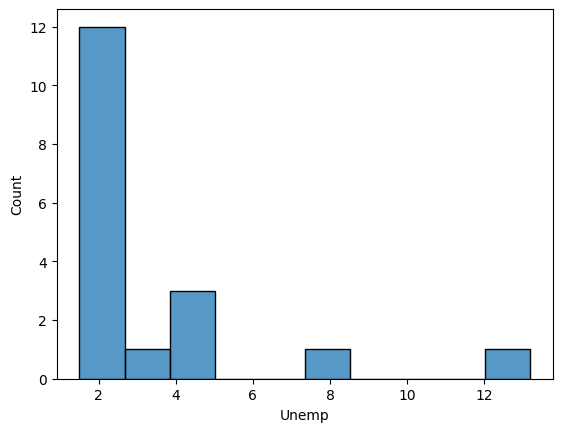

In [4]:
# create the distribution plot
sns.histplot(df['Unemp'], bins=10, label = "Gross Demostic Product Over time")

<div style="background: #e3eefc; padding: 24px 12px; color: #00773E; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold;">The plot confirms that the unemployment rate is positively skewed.</p>
</div>

# 2: Measures of variability
---
**Dispersion** is an indicator of how far away from the center, we can find the data values. The most common measures of dispersion are **variance**, **standard deviation** and **interquartile range (IQR)**. 
* Variance is the standard measure of spread. 
* The standard deviation is the square root of the variance. 

In [5]:
# range
max = data.max()
min = data.min() 
print(f"range = {max - min}")

range = 11.7


In [6]:
# var and std
variance = data.var()
standard_deviation = data.std()
print(f"Variance = {variance}, standard deviation = {standard_deviation}")

Variance = 9.079999999999998, standard deviation = 3.0133038346638723


<div style="background: #e3eefc; padding: 24px 12px; color: #00773E; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold;">Since the mean is around 3, I can say that there is some spread in the unemployment rate.</p>
</div>

In [7]:
# IQR
Q1 = data.quantile(.25)
Q3 = data.quantile(.75)
print(f"IQR = {Q3 - Q1}")

IQR = 2.05


![IQR](https://github.com/mohamedyosef101/unemployment-rate-descriptive-stats/assets/118842452/72ba4d79-26aa-45db-8627-75551f739694)

# 3: Measures of Shape
Now, we will take a look at measures of shape of distribution. There are two statistical measures that can tell us about the shape of the distribution. These measures are **skewness** and **kurtosis**. These measures can be used to convey information about the shape of the distribution of the dataset.

## Skewness
* **Skewness** is a measure of a distribution's symmetry or more precisely lack of symmetry.
* It is used to mean the absence of symmetry from the mean of the dataset.
* It is a characteristic of the deviation from the mean.
* It is used to indicate the shape of the distribution of data.

![skewness](https://github.com/mohamedyosef101/unemployment-rate-descriptive-stats/assets/118842452/de66eb99-4198-46f9-bf87-5bbc8ae9ffed)

### Reference range on skewness values
The rule of thumb for skewness values are:
* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
* If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
* If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [8]:
# we saw the positive skewness eariler 
# But what is the value of it?
df['Unemp'].skew()

2.584394681222697

<div style="background: #e3eefc; padding: 24px 12px; color: #00773E; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p style="color: #BD0000; font-weight: bold;">The skewness value is greater than 1, so we can conclude that the unemployment rate is highly skewed. Which mean as years go and the technology advances the employment rate decrease.</p>
</div>

## Kurtosis
* **Kurtosis** is the degree of peakedness of a distribution.
* Data sets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly and have heavy tails.
* Data sets with low kurtosis tend to have a flat top near the mean rather than a sharp peak.

![Kurtosis](https://github.com/mohamedyosef101/unemployment-rate-descriptive-stats/assets/118842452/29c670bd-f551-4529-924c-9f5a1accda53)

### Reference range for kurtosis
* The reference standard is a normal distribution, which has a kurtosis of 3.
* Often, **excess kurtosis** is presented instead of kurtosis, where excess kurtosis is **simply** kurtosis - 3.

In [9]:
# just to let you know how to use it
df['Unemp'].kurt()

7.064555338912524

This will be helpful when we compare it with the normal distirbution.

---

# The main result
- The unemployment rate is the last years is going down despite the rise of AI and all of these advanced technologies.

So, maybe some jobs are going down and gone by the time, but there are many more are going up and many more people are working thanks to these technologies and advancements.

*You can read more about this observation on my pervious dataset about [unemployment rate and economic growth](https://www.kaggle.com/datasets/mohamedyosef101/economic-growth-and-unemployment-rate)* 

---

# Useful Resources
* Adam Hayes. (2023). [Descriptive Statistics: Definition, Overview, Types, Example](https://www.investopedia.com/terms/d/descriptive_statistics.asp#:~:text=Descriptive%20statistics%20are%20brief%20informational,measures%20of%20variability%20(spread).). Investopedia.

* Prashant Banerjee. (2019). [Descriptive Statistics with Python](https://gist.github.com/pb111/512c840affb32593d28573fbb764045b#file-descriptive-statistics-with-python-ipynb). GitHub Gist.

* Simranjeet Singh. (2023). [The Ultimate Guide to Statistics: Part 1 - Descriptive Statistics](https://pub.towardsai.net/complete-guide-to-statistics-descriptive-statistics-part-1-600a7783be0). Towards AI.

---
If you have any question, feel free to **[send me a message on LinkedIn](https://linkedin.com/in/mohamedyosef101)**.